# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.194129e+01     8.182202e+00
 * time: 0.002125978469848633
     1     2.897838e+01     5.518579e+00
 * time: 0.009260892868041992
     2     1.972418e+01     4.709539e+00
 * time: 0.058149099349975586
     3     1.510469e+01     3.352598e+00
 * time: 0.06567001342773438
     4     1.464414e+01     4.929689e+00
 * time: 0.07240891456604004
     5     1.434731e+01     5.330451e+00
 * time: 0.07822108268737793
     6     1.314012e+01     4.286079e+00
 * time: 0.08349204063415527
     7     1.105357e+01     2.397042e+00
 * time: 0.08962798118591309
     8     9.786497e+00     1.209012e+00
 * time: 0.09656310081481934
     9     9.273012e+00     6.104148e-01
 * time: 0.10304594039916992
    10     9.076611e+00     5.717691e-01
 * time: 0.1094961166381836
    11     9.042293e+00     1.263332e+00
 * time: 0.11487007141113281
    12     8.943646e+00     6.305542e-01
 * time: 0.12150311470031738
    13     8.861485e+00     7.762449e-01
 * tim

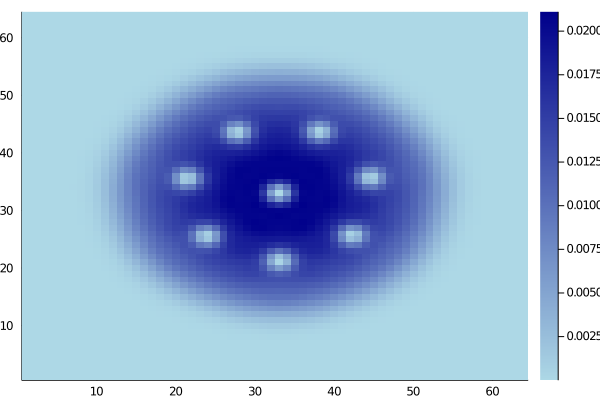

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)